## Ejercicio

Probar distintos métodos de clasificación (SVM, Random Forest) sobre el [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), un conjunto de imágenes de dígitos escritos a mano. El objetivo es, dada una imagen, poder predecir a qué dígito corresponde. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
# Cargamos el dataset
mnist = fetch_openml('mnist_784', version=1)

In [4]:
# Y son los labels
X, Y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
Y.shape

(70000,)

Cada imagen es un array de 784 elementos, correspondiente a $28x28$ pixels. Cada elemento del array es un número entre 0 y 255 que indica la intensidad del pixel, de blanco (0) a negro (255).

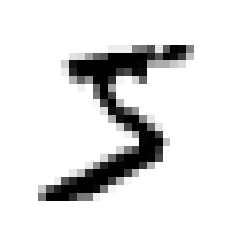

In [7]:
first_digit = X[0]
first_digit_image = first_digit.reshape(28, 28)
plt.imshow(first_digit_image, cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off");

In [8]:
X[0, :]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

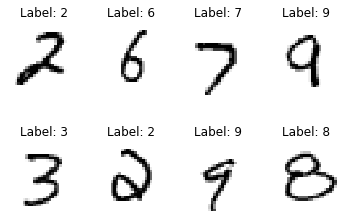

In [9]:
# Plot de varios dígitos
for i in range(1, 9):
    ax = plt.subplot(2,4, i)
    digit = X[36000 + i]
    label = Y[36000 + i]
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap = plt.cm.binary, interpolation="nearest")
    ax.set_title('Label: {}'.format(label))
    plt.axis("off");

In [10]:
# El dataset ya viene con el training set en los primeros 60_000 elementos y el test set en los 10_000 restantes.
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]